In [6]:
import pandas as pd
from fbprophet import Prophet




The input to Prophet is always a dataframe with two columns: ds and y. The ds column should be YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. T

In [7]:
df = pd.read_csv('BeerWineLiquor.csv')

In [8]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [9]:
# this is required
df.columns = ['ds','y']

In [10]:
df['ds'] = pd.to_datetime(df['ds'])

Create and Fit Model

In [12]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
# create daily dataframe periods
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [14]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [15]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [16]:
len(df)

324

In [17]:
len(future)

348

forecast

In [18]:
forecast = m.predict(future)

In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1778.389678,1157.831291,1481.645304,1778.389678,1778.389678,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,0.0,0.0,0.0,1316.488218
1,1992-02-01,1780.987184,1188.127902,1516.114601,1780.987184,1780.987184,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,0.0,0.0,0.0,1353.062229
2,1992-03-01,1783.417109,1432.549763,1768.729627,1783.417109,1783.417109,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,0.0,0.0,0.0,1603.739371
3,1992-04-01,1786.014616,1421.529036,1756.177656,1786.014616,1786.014616,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,0.0,0.0,0.0,1589.923135
4,1992-05-01,1788.528331,1675.423776,1997.042989,1788.528331,1788.528331,45.713009,45.713009,45.713009,45.713009,45.713009,45.713009,0.0,0.0,0.0,1834.241340


In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5204.920380,5088.439744,5402.313444,5192.800895,5217.216522,40.765082,40.765082,40.765082,40.765082,40.765082,40.765082,0.0,0.0,0.0,5245.685462
344,2020-09-01,5221.075787,4926.458974,5256.293048,5207.675226,5234.527177,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,0.0,0.0,0.0,5088.565168
345,2020-10-01,5236.710051,5028.142407,5347.075247,5221.601696,5251.108666,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,0.0,0.0,0.0,5193.429163
346,2020-11-01,5252.865458,5181.978664,5507.801768,5236.338217,5268.246422,87.236362,87.236362,87.236362,87.236362,87.236362,87.236362,0.0,0.0,0.0,5340.101820
347,2020-12-01,5268.499722,6175.363958,6510.240764,5250.642682,5284.836773,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,0.0,0.0,0.0,6340.094626


In [21]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4632.015644,4476.741025,4798.635207
337,2020-02-01,4682.147555,4514.761954,4846.449253
338,2020-03-01,4945.507893,4770.009624,5111.100706
339,2020-04-01,4945.249558,4783.799486,5097.475134
340,2020-05-01,5202.688312,5042.446426,5361.789229
341,2020-06-01,5183.565324,5013.745737,5354.151154
342,2020-07-01,5316.228164,5152.500278,5482.689361
343,2020-08-01,5245.685462,5088.439744,5402.313444
344,2020-09-01,5088.565168,4926.458974,5256.293048
345,2020-10-01,5193.429163,5028.142407,5347.075247


Plot Forecast

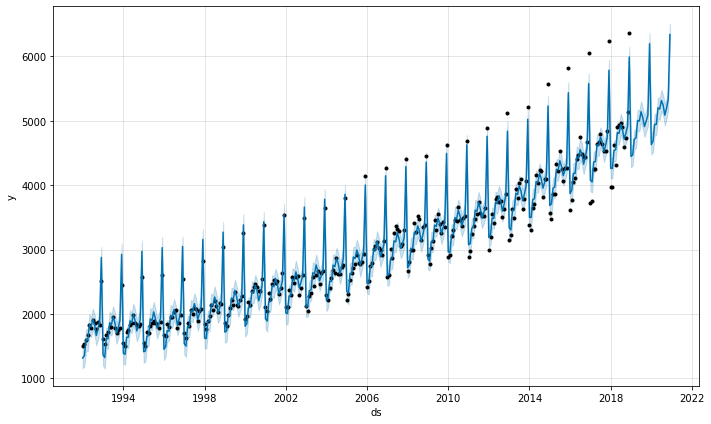

In [23]:
m.plot(forecast);

ConversionError: Failed to convert value(s) to axis units: '2014-01-01'

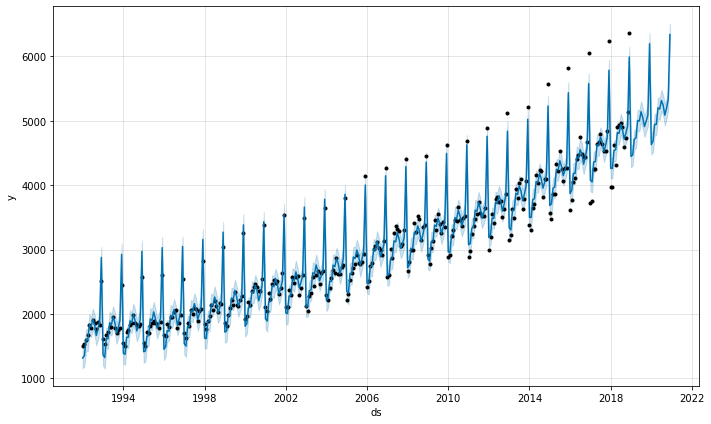

In [24]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

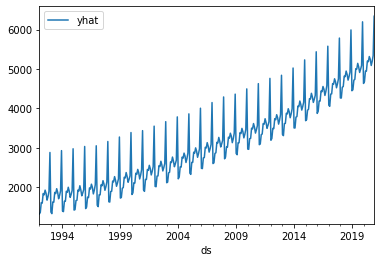

In [25]:
forecast.plot(x='ds',y='yhat')

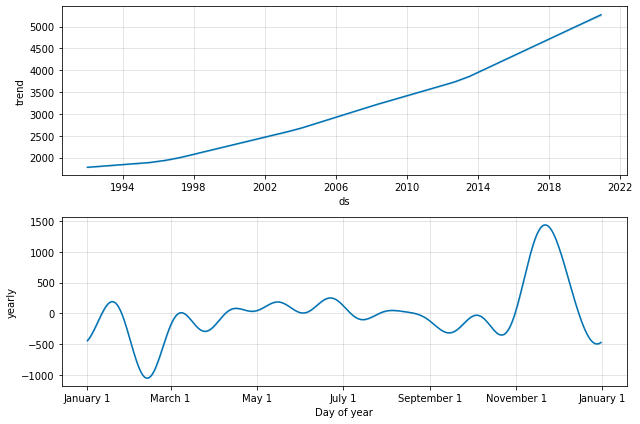

In [26]:
m.plot_components(forecast);
